In [2]:
import pandas as pd
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=100, n_features=20, centers=15, cluster_std=2.0, shuffle=True, random_state=0)
variables = ['辛さ','重厚','スパイシー','果実味','コク','酸味','落ち着き','香り','華やか','ジューシー','熟成','透明感','シャープ','力強い','フレッシュ','渋み','苦味','樽','エキゾチック','粘性']
name = list(map(str,[i for i in range(100)]))
df = pd.DataFrame(X, columns=variables, index=name)

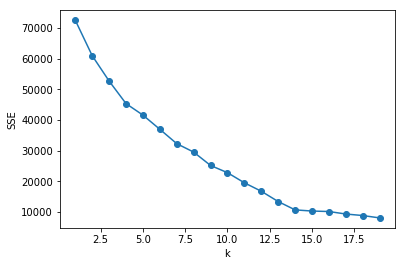

In [3]:
#エルボー法
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
SSE = []
for i in range(1, 20):
    km = KMeans(n_clusters=i, init='random', n_init=10, max_iter=300, tol=1e-04, random_state=0)
    km.fit(X)
    SSE.append(km.inertia_)

plt.plot(range(1,20), SSE, marker='o')
plt.xlabel('k')
plt.ylabel('SSE')
plt.show()

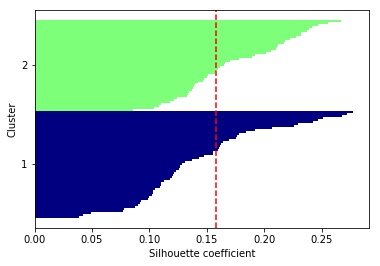

In [28]:
#シルエット法
km = KMeans(n_clusters=2, init='random', n_init=10, max_iter=300, tol=1e-04, random_state=0)
y_km = km.fit_predict(X)
from matplotlib import cm
from sklearn.metrics import silhouette_samples
import numpy as np
cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(X, y_km, metric='euclidean')
y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(i / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, edgecolor='none', color=color)
    yticks.append((y_ax_lower + y_ax_upper) / 2)
    y_ax_lower += len(c_silhouette_vals)

silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color="red", linestyle="--")
plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')
plt.show()

In [25]:
from scipy.spatial.distance import pdist, squareform
row_dist = pd.DataFrame(squareform(pdist(df, metric='euclidean')), columns=name, index=name)
print(row_dist)

            0          1          2          3          4          5  \
0    0.000000  52.624242  41.002106  41.625637  39.249034  47.701933   
1   52.624242   0.000000  41.518133  32.704102  38.814321  30.022858   
2   41.002106  41.518133   0.000000  32.868977  33.399859  27.233159   
3   41.625637  32.704102  32.868977   0.000000  31.392470  33.169500   
4   39.249034  38.814321  33.399859  31.392470   0.000000  43.270015   
5   47.701933  30.022858  27.233159  33.169500  43.270015   0.000000   
6   32.179620  42.322500  42.507352  33.098625  34.126482  41.115787   
7   49.747503  34.028919  41.581994  42.137292  42.763238  35.980141   
8   49.666381  36.617068  41.808531  25.761110  39.462839  43.620806   
9   35.879622  43.626511  39.744987  38.883694  40.779959  39.486565   
10  50.838865  31.601004  26.357573  32.980938  41.791916  10.787777   
11  47.315310  33.713137  39.040665  34.561621  44.266361  30.931352   
12  47.588165  31.706927  25.667231  32.767814  41.475880  12.23

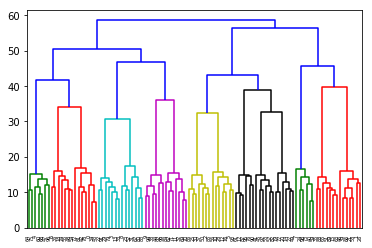

In [26]:
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
row_clusters = linkage(pdist(df, metric='euclidean'), method='complete')
row_dender = dendrogram(row_clusters, labels=name)
plt.show()

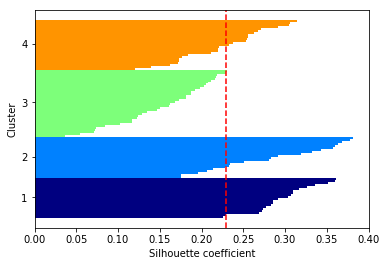

In [29]:
#シルエット法
km = KMeans(n_clusters=4, init='random', n_init=10, max_iter=300, tol=1e-04, random_state=0)
y_km = km.fit_predict(X)
from matplotlib import cm
from sklearn.metrics import silhouette_samples
import numpy as np
cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(X, y_km, metric='euclidean')
y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(i / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, edgecolor='none', color=color)
    yticks.append((y_ax_lower + y_ax_upper) / 2)
    y_ax_lower += len(c_silhouette_vals)

silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color="red", linestyle="--")
plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')
plt.show()

エルボー法を用いた所、明確に何個に分けたほうが良いとは言えないが14あたりがよさそうだという事がわかる。
シルエット法を用いると、２つに分ける場合の当てはまりが良いように思える。
樹形図を描画した所、4つか２つに分けるのが良いのではないかと考えた。シルエット法を用いて４つを描画すると2つほどではないが、当てはまりがよいと考えられる。まず２つを持っていき、数を増やしたい場合は４つにすることを勧める。さらに数が多くても良い場合は、１４つにすることをおすすめする。

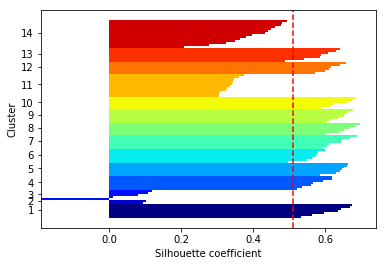

In [4]:
#シルエット法
km = KMeans(n_clusters=14, init='random', n_init=10, max_iter=300, tol=1e-04, random_state=0)
y_km = km.fit_predict(X)
from matplotlib import cm
from sklearn.metrics import silhouette_samples
import numpy as np
cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(X, y_km, metric='euclidean')
y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(i / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, edgecolor='none', color=color)
    yticks.append((y_ax_lower + y_ax_upper) / 2)
    y_ax_lower += len(c_silhouette_vals)

silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color="red", linestyle="--")
plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')
plt.show()